In [1]:
import numpy as np
import pandas as pd
import sklearn.preprocessing as pre
import matplotlib.pyplot as plt

from sklearn.utils.multiclass import class_distribution, unique_labels

#Pré-pocessamento
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import normalize

#Métricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

#Validação crizada
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold

#Modelos de Classificação
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

In [2]:
id_col = ['RI', 'Na', 'Mg', 'Al', 'Si','K', 'Ca', 'Ba', 'Fe', 'Type_of_glass']
df = pd.read_csv('base/glass.csv',  encoding='UTF-8',sep=',', names=id_col, index_col=0)

#print dados
print(df)

          RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type_of_glass
1    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0              1
2    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0              1
3    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0              1
4    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0              1
5    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0              1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...            ...
210  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0              7
211  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0              7
212  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0              7
213  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0              7
214  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0              7

[214 rows x 10 columns]


In [3]:
r_classes = unique_labels(df['Type_of_glass'])
print('Rotulos da classe: ',r_classes)


Rotulos da classe:  [1 2 3 5 6 7]


In [4]:
print('Alguns dados estatisticos')
print(df.describe())

Alguns dados estatisticos
               RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516523   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe  Type_of_glass  
count  214.000000  214.000000  214.000000     214.000000  
mean     8.956963    0.175047    0.057009       2.780374  
std      1.423153    0.497219    0.097439       2.103739  
min     

In [5]:
#X = pd.DataFrame(pre.normalize(df.iloc[:, 0:9], norm='l2'), columns=id_col[1:10])
X = df.iloc[:, 0:9].values
y = df.iloc[:, -1].values

#separação da base em Treinamento × Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=415)

In [6]:
#Classificadores com os paremetros no patrao (arrumar outro nome)
clf = svm.SVC()
knn = KNeighborsClassifier()
gnb = GaussianNB()
mnb = MultinomialNB()

#Colocar um nome
clf.fit(X_train, y_train)
knn.fit(X_train, y_train)
mnb.fit(X_train, y_train)
gnb.fit(X_train, y_train)
print('Classificadores treinados')

Classificadores treinados


In [7]:
#Colocar um nome aqui
y_svm = clf.predict(X_test)
y_knn = knn.predict(X_test)
y_mnb = mnb.predict(X_test)
y_gnb = gnb.predict(X_test)

#Acuracias dos modelos sem pre-processamento
print('k-NN', accuracy_score(y_test, y_knn))
print('Gaussian NB', accuracy_score(y_test, y_gnb))
print('Multinomial NB', accuracy_score(y_test, y_mnb))
print('SVC', accuracy_score(y_test, y_svm))

k-NN 0.6197183098591549
Gaussian NB 0.4084507042253521
Multinomial NB 0.4225352112676056
SVC 0.28169014084507044


In [8]:
#analizar melhot isso aqui
scoring = ['accuracy','precision_macro', 'recall_macro','f1_macro']
scores_svm = cross_validate(clf, X, y, cv=10,scoring=scoring)
print(scores_svm)

{'fit_time': array([0.00343347, 0.00607729, 0.00304055, 0.00333047, 0.00617361,
       0.00341082, 0.00713921, 0.00446343, 0.00322366, 0.00343084]), 'score_time': array([0.00430155, 0.00411415, 0.00857449, 0.00436306, 0.00405884,
       0.00440717, 0.00456858, 0.00505066, 0.00492835, 0.00387096]), 'test_accuracy': array([0.36363636, 0.36363636, 0.36363636, 0.36363636, 0.38095238,
       0.38095238, 0.33333333, 0.33333333, 0.33333333, 0.33333333]), 'test_precision_macro': array([0.06060606, 0.06060606, 0.06060606, 0.06060606, 0.06349206,
       0.07619048, 0.05555556, 0.05555556, 0.05555556, 0.05555556]), 'test_recall_macro': array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.2       , 0.16666667, 0.16666667, 0.16666667, 0.16666667]), 'test_f1_macro': array([0.08888889, 0.08888889, 0.08888889, 0.08888889, 0.09195402,
       0.11034483, 0.08333333, 0.08333333, 0.08333333, 0.08333333])}


#Pré-processamento de dados

Descrever o processo
1. segundo a base de dados, não tem Missing Values(dados ausentes)
1. Não existe dados categoricos, alem das classes
1. Normalização (MinMax, normalização com margem(não sei o nome) )


In [9]:
#Dados normalizados
X_min_max = MinMaxScaler().fit_transform(X.copy())

#separação da base min_max em Treinamento × Teste 
X_min_max_train, X_min_max_test, y_min_max_train, y_min_max_test = train_test_split(X_min_max, y, test_size=0.33, random_state=4135)

print('Dados normalizados (Min_max) \n',X_min_max)

Dados normalizados (Min_max) 
 [[0.43283582 0.43759398 1.         ... 0.30855019 0.         0.        ]
 [0.28358209 0.47518797 0.80178174 ... 0.22304833 0.         0.        ]
 [0.22080773 0.42105263 0.79064588 ... 0.21840149 0.         0.        ]
 ...
 [0.41703248 0.54586466 0.         ... 0.27973978 0.52063492 0.        ]
 [0.23529412 0.54887218 0.         ... 0.28345725 0.4984127  0.        ]
 [0.26163301 0.52631579 0.         ... 0.2964684  0.53015873 0.        ]]


In [10]:
X_norm = normalize(X.copy(), norm='l2')
#separação da base min_max em Treinamento × Teste 
X_norm_train, X_norm_test, y_norm_train, y_norm_test = train_test_split(X_norm, y, test_size=0.33, random_state=4215)

print('Dados normalizados (Normalization) \n',X_norm)

Dados normalizados (Normalization) 
 [[0.02062461 0.18495587 0.06088357 ... 0.11864837 0.         0.        ]
 [0.02035047 0.18625869 0.04827439 ... 0.1049968  0.         0.        ]
 [0.02028154 0.18098728 0.04748742 ... 0.10407103 0.         0.        ]
 ...
 [0.02018222 0.19058739 0.         ... 0.11201654 0.02176625 0.        ]
 [0.02007671 0.19037334 0.         ... 0.11226467 0.02078485 0.        ]
 [0.02015143 0.18901387 0.         ... 0.11449751 0.02218223 0.        ]]


In [11]:
#Treinamento com base min_max
# Colocar um nome
clf.fit(X_min_max_train, y_min_max_train)
knn.fit(X_min_max_train, y_min_max_train)
mnb.fit(X_min_max_train, y_min_max_train)
gnb.fit(X_min_max_train, y_min_max_train)
print('Classificadores treinados para os dados X_min_max')

Classificadores treinados para os dados X_min_max


In [12]:
#predicao com base min_max
#Colocar um nome aqui
y_min_max_svm = clf.predict(X_min_max_test)
y_min_max_knn = knn.predict(X_min_max_test)
y_min_max_mnb = mnb.predict(X_min_max_test)
y_min_max_gnb = gnb.predict(X_min_max_test)

#Acuracias dos modelos sem pre-processamento
print('k-NN\n', classification_report(y_min_max_test, y_min_max_knn))
print('Gaussian NB\n', classification_report(y_min_max_test, y_min_max_gnb))
print('Multinomial NB\n', classification_report(y_min_max_test, y_min_max_mnb))
print('SVC\n', classification_report(y_min_max_test, y_min_max_svm))

k-NN
               precision    recall  f1-score   support

           1       0.67      0.76      0.71        21
           2       0.58      0.78      0.67        23
           3       0.00      0.00      0.00         9
           5       0.67      0.25      0.36         8
           6       0.50      1.00      0.67         2
           7       0.67      0.75      0.71         8

    accuracy                           0.62        71
   macro avg       0.51      0.59      0.52        71
weighted avg       0.55      0.62      0.57        71

Gaussian NB
               precision    recall  f1-score   support

           1       0.75      0.14      0.24        21
           2       0.67      0.17      0.28        23
           3       0.20      0.89      0.32         9
           5       0.75      0.38      0.50         8
           6       0.50      1.00      0.67         2
           7       0.67      1.00      0.80         8

    accuracy                           0.39        71
   m

In [13]:
#Treinamento com base min_max
# Colocar um nome
clf.fit(X_norm_train, y_norm_train)
knn.fit(X_norm_train, y_norm_train)
mnb.fit(X_norm_train, y_norm_train)
gnb.fit(X_norm_train, y_norm_train)
print('Classificadores treinados para os dados X_norm')

Classificadores treinados para os dados X_norm


In [14]:
#predicao com base min_max
#Colocar um nome aqui
y_norm_svm = clf.predict(X_norm_test)
y_norm_knn = knn.predict(X_norm_test)
y_norm_mnb = mnb.predict(X_norm_test)
y_norm_gnb = gnb.predict(X_norm_test)

#Acuracias dos modelos sem pre-processamento
print('k-NN\n', classification_report(y_norm_test, y_norm_knn))
print('Gaussian NB\n', classification_report(y_norm_test, y_norm_gnb))
print('Multinomial NB\n', classification_report(y_norm_test, y_norm_mnb))
print('SVC\n', classification_report(y_norm_test, y_norm_svm))

k-NN
               precision    recall  f1-score   support

           1       0.63      0.79      0.70        24
           2       0.67      0.67      0.67        24
           3       0.00      0.00      0.00         4
           5       0.50      0.75      0.60         4
           6       0.00      0.00      0.00         5
           7       0.89      0.80      0.84        10

    accuracy                           0.65        71
   macro avg       0.45      0.50      0.47        71
weighted avg       0.59      0.65      0.62        71

Gaussian NB
               precision    recall  f1-score   support

           1       0.50      0.83      0.62        24
           2       0.25      0.04      0.07        24
           3       0.17      0.25      0.20         4
           5       0.22      0.50      0.31         4
           6       0.71      1.00      0.83         5
           7       1.00      0.50      0.67        10

    accuracy                           0.48        71
   m

In [15]:
#K-fold
n_splits=5
n_repeats=10
rkf = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=2652124)

In [16]:
def K_fold(clf,X_, y_, axis_=None, metrica='accuracy'):
    ind_k_fold = rkf.split(X_)
    temp = []
    for train_index, test_index in ind_k_fold:
        X_train, X_test = X_[train_index], X_[test_index]
        y_train, y_test = y_[train_index], y_[test_index]

        clf.fit(X_train,y_train)
        y_np = clf.predict(X_test)
        scores_svm = classification_report(y_test,y_np,output_dict=True) 
        temp.append(scores_svm[metrica])
    return np.array(temp).reshape(n_splits,n_repeats).mean(axis=axis_)

def valida_paremetros(C:list, X_,y_,metrica='accuracy',kernel_='rbf', degree_=3,axis_=None):
    resp = []
    if len(C)>1:
        for x in C:
            clf = svm.SVC(C=x,kernel=kernel_,degree=degree_)
            resp.append([x, K_fold(clf,X_,y_,axis_,metrica)])
        return np.array(resp)
    elif len(degree_)>1 and kernel_=='poly':
        for x in degree_:
            clf = svm.SVC(C=C[0],kernel=kernel_,degree=x)
            resp.append([x, K_fold(clf,X_,y_,axis_,metrica)])
        return np.array(resp)
    else:
        clf = svm.SVC(C=C,kernel=kernel_,degree=x)
        return [x, K_fold(clf,X_,y_,axis_,metrica)]

In [17]:
#
C = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131,137, 139, 149]
acuracias = valida_paremetros(C,X,y)
print(acuracias)

[[  2.           0.31579181]
 [  3.           0.31579181]
 [  5.           0.31579181]
 [  7.           0.31625692]
 [ 11.           0.38079734]
 [ 13.           0.41116279]
 [ 17.           0.42712071]
 [ 19.           0.42383167]
 [ 23.           0.42520487]
 [ 29.           0.43219269]
 [ 31.           0.4303433 ]
 [ 37.           0.43829457]
 [ 41.           0.44109635]
 [ 43.           0.44390919]
 [ 47.           0.44672204]
 [ 53.           0.45374308]
 [ 59.           0.46723145]
 [ 61.           0.47001107]
 [ 67.           0.47189369]
 [ 71.           0.47376523]
 [ 73.           0.47564784]
 [ 79.           0.47891473]
 [ 83.           0.486866  ]
 [ 89.           0.48781838]
 [ 97.           0.49242525]
 [101.           0.49429679]
 [103.           0.49662237]
 [107.           0.50131783]
 [109.           0.50086379]
 [113.           0.50133998]
 [127.           0.50087486]
 [131.           0.50227021]
 [137.           0.50977852]
 [139.           0.50744186]
 [149.        

In [18]:
acuracias_mm = valida_paremetros(C,X_min_max,y)
print(acuracias_mm)

[[  2.           0.68180509]
 [  3.           0.69537099]
 [  5.           0.69491694]
 [  7.           0.69538206]
 [ 11.           0.69165006]
 [ 13.           0.69447398]
 [ 17.           0.68932447]
 [ 19.           0.68699889]
 [ 23.           0.6841639 ]
 [ 29.           0.68324474]
 [ 31.           0.68090808]
 [ 37.           0.68324474]
 [ 41.           0.6851052 ]
 [ 43.           0.68511628]
 [ 47.           0.68745293]
 [ 53.           0.69116279]
 [ 59.           0.69258029]
 [ 61.           0.69258029]
 [ 67.           0.69303433]
 [ 71.           0.69302326]
 [ 73.           0.69348837]
 [ 79.           0.69540421]
 [ 83.           0.69633444]
 [ 89.           0.69589147]
 [ 97.           0.69774086]
 [101.           0.69820598]
 [103.           0.69634551]
 [107.           0.69586932]
 [109.           0.69539313]
 [113.           0.69586932]
 [127.           0.69351052]
 [131.           0.69445183]
 [137.           0.6930454 ]
 [139.           0.69445183]
 [149.        

In [19]:
acuracias_norm = valida_paremetros(C,X_norm,y)
print(acuracias_norm)

[[  2.           0.31579181]
 [  3.           0.31579181]
 [  5.           0.31579181]
 [  7.           0.31625692]
 [ 11.           0.36719823]
 [ 13.           0.40648948]
 [ 17.           0.42943522]
 [ 19.           0.42758583]
 [ 23.           0.42987818]
 [ 29.           0.43312292]
 [ 31.           0.43734219]
 [ 37.           0.44016611]
 [ 41.           0.44156146]
 [ 43.           0.44156146]
 [ 47.           0.44533776]
 [ 53.           0.4579402 ]
 [ 59.           0.46492802]
 [ 61.           0.46767442]
 [ 67.           0.4751495 ]
 [ 71.           0.47660022]
 [ 73.           0.47937984]
 [ 79.           0.48361019]
 [ 83.           0.48874862]
 [ 89.           0.493433  ]
 [ 97.           0.49851606]
 [101.           0.50036545]
 [103.           0.50085271]
 [107.           0.50557032]
 [109.           0.50507198]
 [113.           0.50552602]
 [127.           0.50650055]
 [131.           0.51118494]
 [137.           0.51213732]
 [139.           0.51119601]
 [149.        

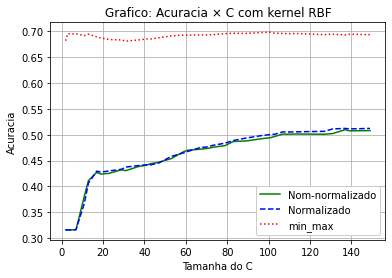

In [24]:
#Plot 
plt.plot(acuracias[:,0], acuracias[:,1], color='g', label='Nom-normalizado')
plt.plot(acuracias_norm[:,0], acuracias_norm[:,1], color='b' , linestyle='--', label='Normalizado')
plt.plot(acuracias_mm[:,0], acuracias_mm[:,1], color='r',linestyle=':', label='min_max')
plt.ylabel('Acuracia')
plt.xlabel('Tamanha do C')
plt.title('Grafico: Acuracia × C com kernel RBF')
plt.grid(True)
plt.legend(framealpha=1, frameon=True)
plt.show()

In [21]:
#Baseado nos resultado anteriores
C_max_non_norm = acuracias[np.where(acuracias == acuracias[:,1].max(axis=0))[0]][0]
C_max_min_max= acuracias_mm[np.where(acuracias_mm == acuracias_mm[:,1].max(axis=0))[0]][0]
C_max_norm= acuracias_norm[np.where(acuracias_norm == acuracias_norm[:,1].max(axis=0))[0]][0]

#Escolha da Base e do C
Cs = [C_max_non_norm,C_max_min_max,C_max_norm]

C = 0
for e,i in enumerate(Cs):
    if Cs[e][1] > Cs[C][1]:
        C = e

base_max = [X,X_min_max,X_norm][C]
C = Cs[C][0]
print('Base:')
print(base_max)
print('C:')
print(C)

Base:
[[0.43283582 0.43759398 1.         ... 0.30855019 0.         0.        ]
 [0.28358209 0.47518797 0.80178174 ... 0.22304833 0.         0.        ]
 [0.22080773 0.42105263 0.79064588 ... 0.21840149 0.         0.        ]
 ...
 [0.41703248 0.54586466 0.         ... 0.27973978 0.52063492 0.        ]
 [0.23529412 0.54887218 0.         ... 0.28345725 0.4984127  0.        ]
 [0.26163301 0.52631579 0.         ... 0.2964684  0.53015873 0.        ]]
C:
101.0


In [22]:
# Com base 101 não dá para usar grau maior que 71 rapidamente 
# d = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131,137, 139, 149]
d = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67]
acuracias_poly = valida_paremetros([C],base_max,y,kernel_='poly', degree_=d)
print(acuracias_poly)

[[ 2.          0.69025471]
 [ 3.          0.70665559]
 [ 5.          0.67810631]
 [ 7.          0.66405316]
 [11.          0.66497231]
 [13.          0.65756368]
 [17.          0.65292359]
 [19.          0.65101883]
 [23.          0.64911406]
 [29.          0.64676633]
 [31.          0.64772979]
 [37.          0.6369103 ]
 [41.          0.64021041]
 [43.          0.64346622]
 [47.          0.64394241]
 [53.          0.63316722]
 [59.          0.62945736]
 [61.          0.63087486]
 [67.          0.62898117]]


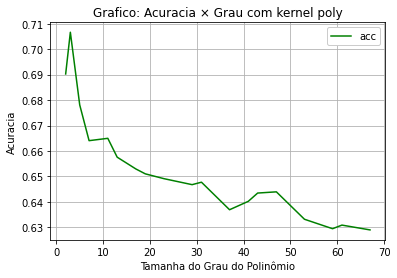

In [26]:
#Plot 
plt.plot(acuracias_poly[:,0], acuracias_poly[:,1], color='g', label='acc')
plt.ylabel('Acuracia')
plt.xlabel('Tamanha do Grau do Polinômio')
plt.title('Grafico: Acuracia × Grau com kernel poly')
plt.legend(framealpha=1, frameon=True)
plt.grid(True)
plt.show()

#Referencias

1. Um guia completo para o pré-processamento de dados em machine learning -  https://caiquecoelho.medium.com/um-guia-completo-para-o-pr%C3%A9-processamento-de-dados-em-machine-learning-f860fbadabe1 
1. Magnitude e normalização de vetores - https://pt.khanacademy.org/computing/computer-programming/programming-natural-simulations/programming-vectors/a/vector-magnitude-normalization#:~:text=Em%20outras%20palavras%2C%20para%20normalizar,5%20sobre%205%20%C3%A9%201.